In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob
from collections import defaultdict

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# Compare host-virus k-mer collisions across k-mer sizes

## Parse KAT output files

In [2]:
def parse_KAT_stat_file(filepath, data):
    data['kmer_size'].append(int(filepath.split('/')[-1].split('_')[0]))
    with open(filepath) as fh:
        stats = fh.readlines()

    data['total_kmers_in_human'].append(int(stats[5].split(':')[-1].strip()))
    data['total_kmers_in_virus'].append(int(stats[6].split(':')[-1].strip()))
    data['shared_kmers_in_human'].append(int(stats[21].split(':')[-1].strip()))
    data['shared_kmers_in_virus'].append(int(stats[22].split(':')[-1].strip()))
    data['distinct_shared_kmers'].append(int(stats[23].split(':')[-1].strip()))
    return data
    
data = defaultdict(list)
for kmer_comparison in glob('data/kmer_comparison/*.stats'):
    parse_KAT_stat_file(kmer_comparison, data)
    
data = pd.DataFrame(data).sort_values('kmer_size')

## Total Colliding K-mers in Each Genome

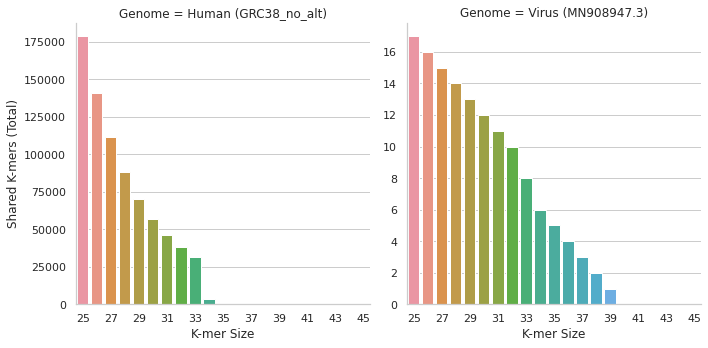

In [3]:
tidy_data = data.drop(['total_kmers_in_human', 'total_kmers_in_virus', 'distinct_shared_kmers'], axis=1)\
                .rename(columns={'kmer_size': 'K-mer Size'})
tidy_data =  pd.melt(tidy_data, id_vars='K-mer Size', var_name='Genome', value_name='Shared K-mers (Total)')
tidy_data['Genome'] = tidy_data['Genome'].str.replace('shared_kmers_in_human', 'Human (GRC38_no_alt)')
tidy_data['Genome'] = tidy_data['Genome'].str.replace('shared_kmers_in_virus', 'Virus (MN908947.3)')

g = sns.catplot(data = tidy_data, x='K-mer Size', y='Shared K-mers (Total)', col='Genome', kind='bar', sharey=False)

ticklabels = []
for x in range(25,46):
    if x % 2 == 1:
        ticklabels.append(x)
    else:
        ticklabels.append('')
g.set(xticklabels=ticklabels)

plt.tight_layout()
plt.savefig('total_shared_kmers.png', dpi=600)

## Distinct Colliding K-mers
i.e. number of unique k-mers that are shared between the two genomes

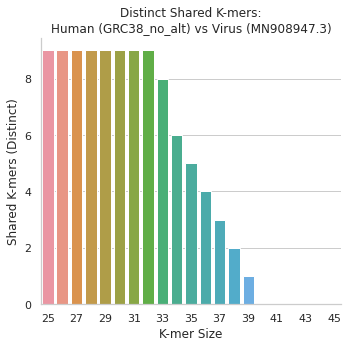

In [5]:
tidy_data = data.drop(['total_kmers_in_human', 'total_kmers_in_virus', 'shared_kmers_in_human', 'shared_kmers_in_virus'], axis=1)\
                .rename(columns={'kmer_size': 'K-mer Size'})
tidy_data =  pd.melt(tidy_data, id_vars='K-mer Size', value_name='Shared K-mers (Distinct)')

g = sns.catplot(data = tidy_data, x='K-mer Size', y='Shared K-mers (Distinct)', kind='bar')

ticklabels = []
for x in range(25,46):
    if x % 2 == 1:
        ticklabels.append(x)
    else:
        ticklabels.append('')
g.set(xticklabels=ticklabels)

plt.title('Distinct Shared K-mers:\nHuman (GRC38_no_alt) vs Virus (MN908947.3)')
plt.tight_layout()
plt.savefig('distinct_shared_kmers.png', dpi=600)